**Rendra Gunawan//A11.2022.14235//DS05**
Link google Colab: https://colab.research.google.com/drive/1l5OWZsZIuOKziD0GuIV33zU-kH8Js2J7?usp=sharing

In [35]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [37]:
# membaca dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Bengkod/ObesityDataSet.csv'
df = pd.read_csv(file_path, na_values='?')
df.head(10)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.000000,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.000000,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.000000,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.800000,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,29.0,Male,1.62,53.000000,Sometimes,yes,2.0,3.0,no,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,23.0,Female,1.50,55.000000,Sometimes,yes,3.0,3.0,no,no,2.0,yes,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,22.0,Male,1.64,53.000000,Sometimes,no,2.0,3.0,no,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,24.0,Male,1.78,348.497776,Frequently,yes,3.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
9,22.0,Male,1.72,68.000000,no,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight


# EDA

In [38]:
# Menampilkan informasi dataset
print("--- Informasi Dataset ---")
df.info()

--- Informasi Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2089 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2091 non-null   object 
 5   FAVC                            2089 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2093 non-null   object 
 9   SMOKE                           2098 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2088 non-null   object 
 12  FAF     

In [39]:
# menampilkan deskripsi dataset numerik
print("--- Deskripsi Statistik Dataset Numerik ---")
df.describe()

--- Deskripsi Statistik Dataset Numerik ---


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2089.000000,2089.000000,2092.000000,2093.000000,2089.000000,2096.000000,2092.000000,2096.000000
mean,24.717928,1.706623,88.608184,2.443519,2.729418,2.030560,1.073435,0.680138
std,8.391323,0.117700,36.154617,0.642754,0.981124,0.737945,1.149364,0.717160
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.955257,1.630000,66.000000,2.000000,2.675411,1.569911,0.129009,0.000000
50%,22.814657,1.701284,83.000000,2.397284,3.000000,2.000000,1.000000,0.625360
75%,26.000000,1.770000,108.055736,3.000000,3.000000,2.482454,1.683612,1.000000
max,106.441252,2.853986,441.131078,8.706795,12.299828,9.233294,12.270275,7.669504


In [40]:
# menampilkan deskripsi dataset kategorikal
print("--- Deskripsi Statistik Dataset Kategorikal---")
df.describe(include=['object','category'])

--- Deskripsi Statistik Dataset Kategorikal---


,Gender,CALC,FAVC,SCC,SMOKE,family_history_with_overweight,CAEC,MTRANS,NObeyesdad
count,2089,2091,2089,2093,2098,2088,2093,2099,2111
unique,2,4,2,2,2,2,4,5,7
top,Male,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_I
freq,1056,1386,1844,1997,2054,1705,1747,1572,351


In [41]:
# mendeteksi missing value
missing = df.isna().sum() #missing = missing value
print("--- Missing values per column ---\n", missing)

--- Missing values per column ---
 Age                               22
Gender                            22
Height                            22
Weight                            19
CALC                              20
FAVC                              22
FCVC                              18
NCP                               22
SCC                               18
SMOKE                             13
CH2O                              15
family_history_with_overweight    23
FAF                               19
TUE                               15
CAEC                              18
MTRANS                            12
NObeyesdad                         0
dtype: int64


In [42]:
# menampilkan data unik
print("--- Data Unik --- \n", df.nunique())

--- Data Unik --- 
 Age                               1393
Gender                               2
Height                            1561
Weight                            1517
CALC                                 4
FAVC                                 2
FCVC                               807
NCP                                636
SCC                                  2
SMOKE                                2
CH2O                              1262
family_history_with_overweight       2
FAF                               1185
TUE                               1129
CAEC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64


In [43]:
# mendeteksi duplikat
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 18


In [44]:
# menentukan keseimbangan
target_counts = df['NObeyesdad'].value_counts()
print("--- Target Balance --- \n", target_counts)

--- Target Balance --- 
 NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


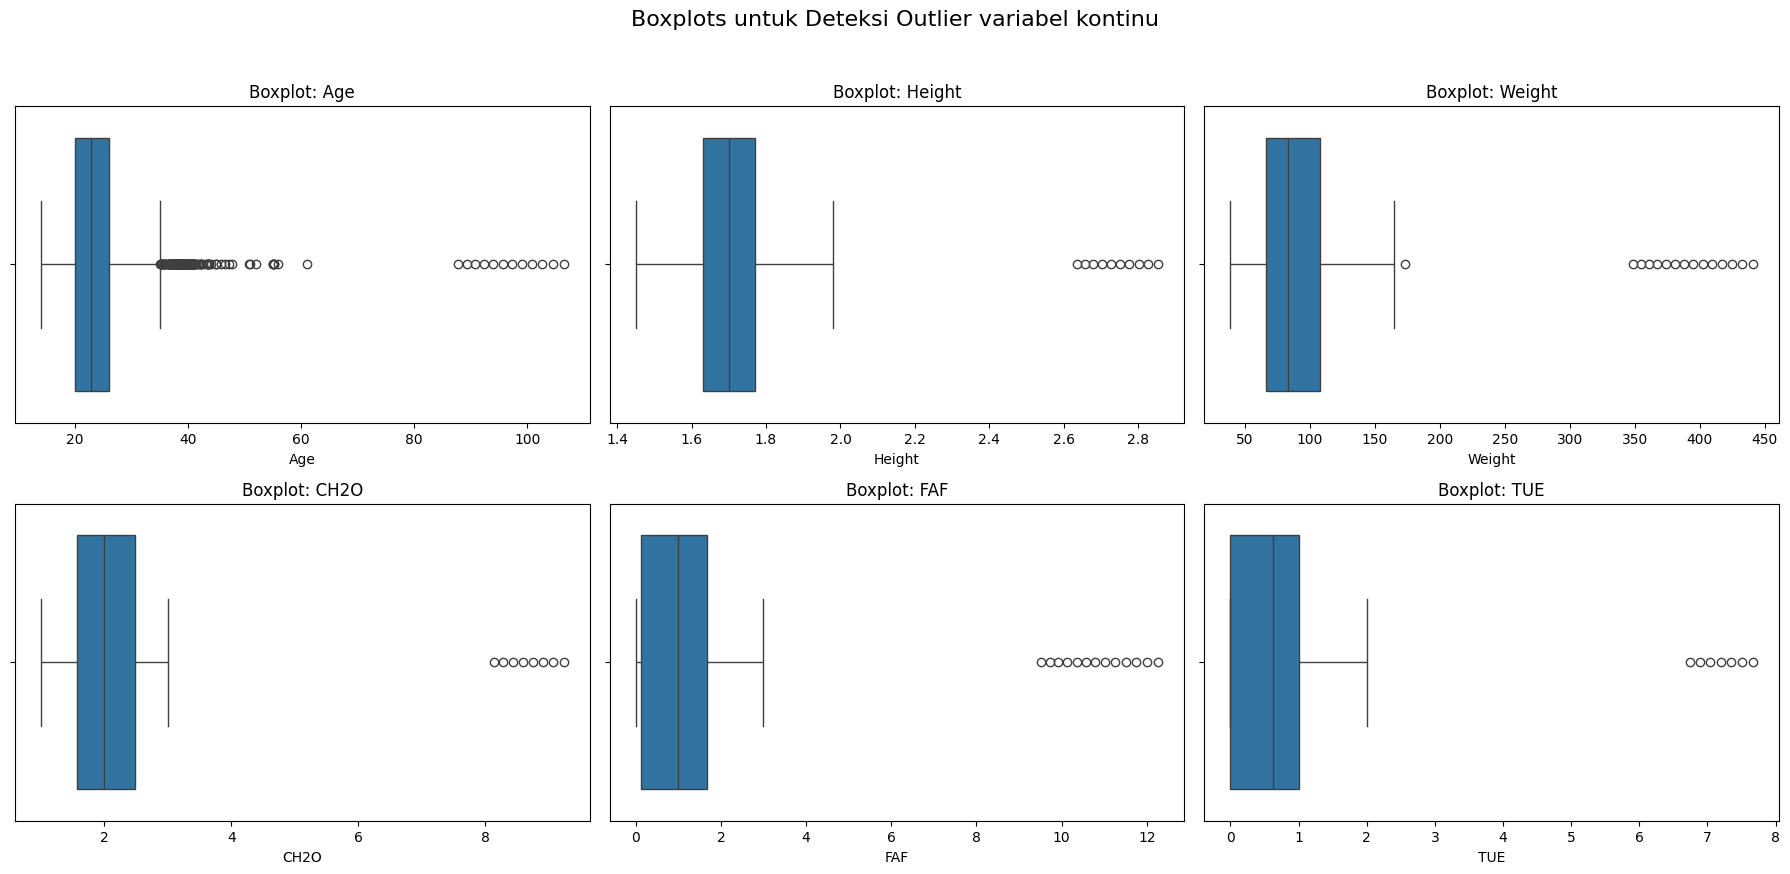

In [45]:
# boxplot untuk mendeteksi outlier variabel kontinu
numeric_columns = ["Age", "Height", "Weight", "CH2O", "FAF", "TUE"]
valid_continuous = [col for col in numeric_columns if col in df.columns]
plt.figure(figsize=(18, 12))
for i, col in enumerate(valid_continuous,1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x=col, orient='h')
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()

plt.suptitle('Boxplots untuk Deteksi Outlier variabel kontinu', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

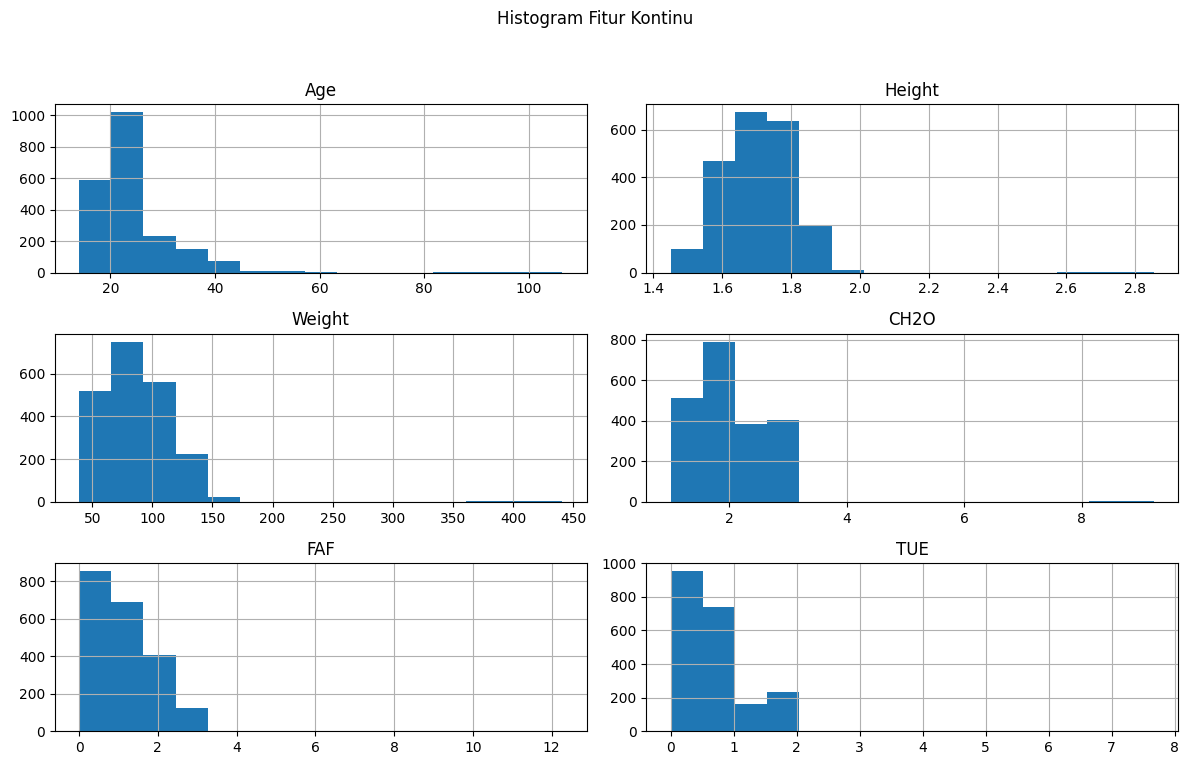

In [46]:
# menentukan histogram fitur kontinu
valid_cols = [col for col in numeric_columns if col in df.columns]
for col in valid_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

plt.figure(figsize=(12, 8))
if valid_cols:
    df[valid_cols].hist(bins=15, figsize=(12, 8))
    plt.suptitle('Histogram Fitur Kontinu')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

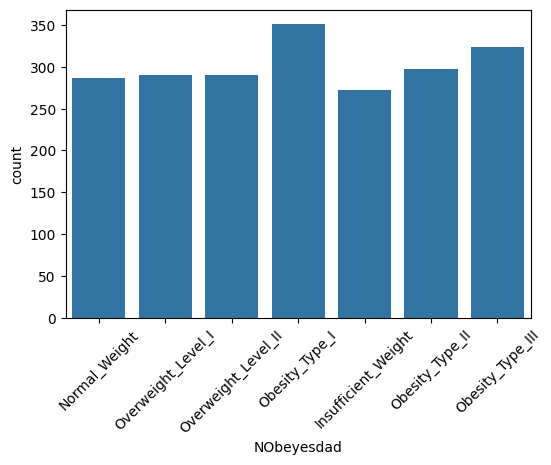

NObeyesdad
Obesity_Type_I         0.166272
Obesity_Type_III       0.153482
Obesity_Type_II        0.140692
Overweight_Level_I     0.137376
Overweight_Level_II    0.137376
Normal_Weight          0.135955
Insufficient_Weight    0.128849
Name: proportion, dtype: float64


In [47]:
# Target balance
plt.figure(figsize=(6,4))
sns.countplot(x='NObeyesdad',data=df)
plt.xticks(rotation=45)
plt.show()
print(df['NObeyesdad'].value_counts(normalize=True))

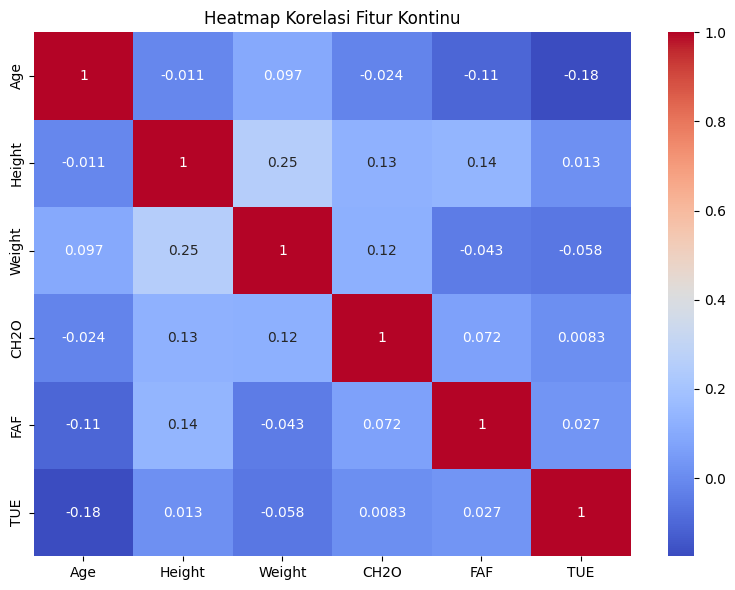

In [48]:
# Heatmap korelasi fitur kontinu
plt.figure(figsize=(8, 6))
if valid_cols:
    corr_matrix = df[valid_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Heatmap Korelasi Fitur Kontinu')
    plt.tight_layout()
    plt.show()

# Kesimpulan EDA

Pada tahap EDA memiliki permasalahan yaitu banyak kolom numerik yang terbaca sebagai objek, untuk data yang hilang sedikit, dan ada beberapa data duplikat. tapi distribusi kelas pada variabel target teridentifikasi relatif seimbang, faktor kelas pada variabel target ini merupakan kondisi ideal untuk pemodelan klasifikasi

# Preprocessing

In [49]:
# memisahkan fitur(X) dan target(y)
target_col = 'NObeyesdad'
X = df.drop(columns=[target_col])
y = df[target_col].copy()
print(f"Shapes – X: {X.shape}, y: {y.shape}")

Shapes – X: (2111, 16), y: (2111,)


In [50]:
# Identifikasi kolom numerik dan kategorikal
numerik_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
kategori_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

In [51]:
# Konversi kolom numerik menjadi float
for col in numerik_cols:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# mengecek apakah tipe data kolom numerik sudah menjadi float
print("--- Info Tipe kolom Numerik ---")
X[numerik_cols].info()

--- Info Tipe kolom Numerik ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     2089 non-null   float64
 1   Height  2089 non-null   float64
 2   Weight  2092 non-null   float64
 3   FCVC    2093 non-null   float64
 4   NCP     2089 non-null   float64
 5   CH2O    2096 non-null   float64
 6   FAF     2092 non-null   float64
 7   TUE     2096 non-null   float64
dtypes: float64(8)
memory usage: 132.1 KB


In [52]:
# menangani missing value pada kolom numerik dan kategori
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

X[numerik_cols] = imputer_num.fit_transform(X[numerik_cols])
X[kategori_cols] = imputer_cat.fit_transform(X[kategori_cols])
print("Jumlah missing values: ", pd.DataFrame(X).isnull().sum().sum())

Jumlah missing values:  0


In [53]:
# One-hot encode untuk kolom kategorikal
X = pd.get_dummies(X, columns=kategori_cols, drop_first=True)
print(f"\nBentuk data X setelah one-hot encoding: {X.shape}")


Bentuk data X setelah one-hot encoding: (2111, 23)


In [54]:
# Standarisasi fitur numerik
scaler = StandardScaler()
X[numerik_cols] = scaler.fit_transform(X[numerik_cols])

print("\n=== Baris Pertama Data X Setelah Preprocessing Selesai ===")
display(X.head())




=== Baris Pertama Data X Setelah Preprocessing Selesai ===


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-0.443006,-0.739524,-0.682408,-0.692524,0.274304,-0.041274,-0.937799,0.448247,False,True,...,False,False,False,False,False,True,False,False,True,False
1,-0.443006,-1.593802,-0.904711,0.870296,0.274304,1.318996,1.684745,-0.951428,False,True,...,False,True,True,False,True,False,False,False,True,False
2,-0.203420,0.798176,-0.321165,-0.692524,0.274304,-0.041274,0.810564,0.448247,True,True,...,False,False,False,True,False,False,False,False,True,False
3,0.275753,0.798176,-0.043285,0.870296,0.274304,-0.041274,0.810564,-0.951428,True,False,...,False,False,False,True,False,False,False,False,False,True
4,-0.323213,0.627321,0.034521,-0.692524,-1.774560,-0.041274,-0.937799,-0.951428,True,False,...,False,False,False,False,True,False,False,False,True,False


In [55]:
# df_clean = pd.concat([X, y.reset_index(drop=True)], axis=1)
# df_clean.to_csv('/content/drive/MyDrive/Colab Notebooks/Bengkod/ObesityDataSet_cleaned.csv', index=False)
# dataset diatas berhasil disimpan pada google drive sehingga command dijadikan pagar agar tidak tersimpan berkali-kali

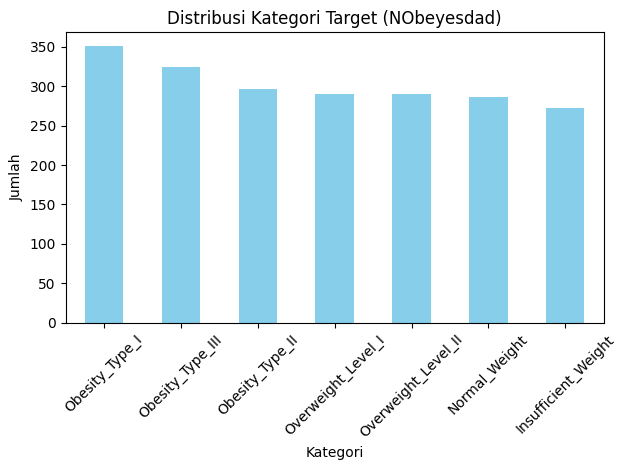

In [56]:
#Visualisasi distribusi target
y.value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribusi Kategori Target (NObeyesdad)')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [57]:
#Hitung korelasi antara fitur dan target
encoded_target = y.astype('category').cat.codes
df_corr_all = X[numerik_cols].copy()
df_corr_all['target_encoded'] = encoded_target

corr_target = df_corr_all.corr(numeric_only=True)['target_encoded'].drop('target_encoded')

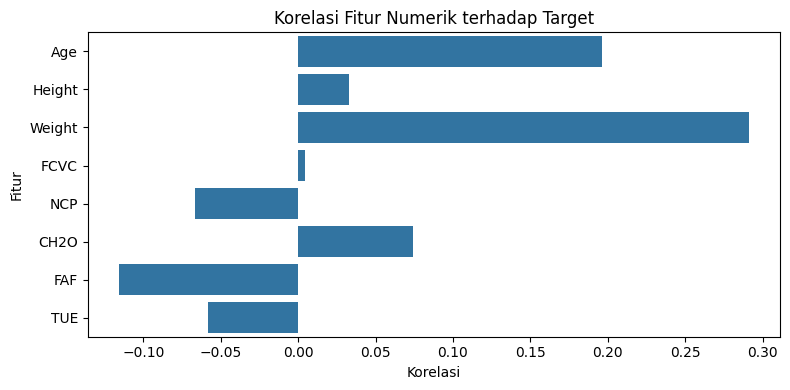

In [58]:
# Visualisasi korelasi terhadap target
plt.figure(figsize=(8, 4))
sns.barplot(x=corr_target.values, y=corr_target.index)
plt.title('Korelasi Fitur Numerik terhadap Target')
plt.xlabel('Korelasi')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()

# Kesimpulan Preprocessing

Di tahap ini tipe data yang memiliki kesalahan dikonversi menjadi numerik, nilai kosong diisi dengan strategi median dan modus, lalu dilakukan one-hot encoding, dan standarisasi fitur numerik.

# Modeling

In [60]:
# membagi data menjadi data train, dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"data train(X_train): {X_train.shape}") #ukuran data yang dilatih
print(f"data test(X_test): {X_test.shape}") #ukuran data yang diuji

data train(X_train): (1688, 23)
data test(X_test): (423, 23)
